In [1]:
import pandas as pd
from os import getcwd

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans


import matplotlib.pyplot as plt 

getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\project-04\\CISautoData'

# Clean the data

-----

In [2]:
df = pd.read_csv('cleaned_sedan_data.csv')

df.head()

,vf_BodyClass,vf_Make,vf_Model,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_BodyCabType,vf_Doors,vf_EngineCylinders,vf_EngineHP,vf_FuelTypePrimary,vf_TransmissionStyle,vin
0,Sedan/Saloon,HONDA,Accord,1861.0,2011.0,66253,0,0,Dark Amber Metallic,Not Applicable,4.0,4.0,177.0,Gasoline,Automatic,17db7a4f0262c5312dbc4f00c126e02dcaac8a17f81a6d...
1,Sedan/Saloon,HONDA,Civic,1863.0,2014.0,81493,0,0,Black,Not Applicable,4.0,4.0,205.0,Gasoline,Manual/Standard,a9a44eb9d5b82470cdf9692f33597cf8b2d33868a0a537...
2,Sedan/Saloon,CHEVROLET,Malibu,1834.0,2012.0,79232,0,0,Black Granite Metallic,Not Applicable,4.0,4.0,NaN,Gasoline,Automatic,4a402fc8181916a7fdddeb00509bbd14a278d29265b046...
3,Sedan/Saloon,CHEVROLET,Malibu,1834.0,2017.0,23056,0,0,Cajun Red Tintcoat,Not Applicable,4.0,4.0,NaN,Gasoline,Automatic,88c484edf48234c4e6d824ae18320de19c7bcb00bdecec...
4,Sedan/Saloon,FORD,Fiesta,3267.0,2015.0,31793,0,0,Tuxedo Black,Not Applicable,4.0,4.0,120.0,Flexible Fuel Vehicle (FFV),Automatic,c96cfc665d912be3a39b4dc3126faa11dd2f9e589b849c...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613306 entries, 0 to 613305
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vf_BodyClass          613306 non-null  object 
 1   vf_Make               613306 non-null  object 
 2   vf_Model              613209 non-null  object 
 3   vf_ModelID            613209 non-null  float64
 4   vf_ModelYear          613303 non-null  float64
 5   mileage               613306 non-null  int64  
 6   askPrice              613306 non-null  int64  
 7   msrp                  613306 non-null  int64  
 8   color                 579514 non-null  object 
 9   vf_BodyCabType        613201 non-null  object 
 10  vf_Doors              611544 non-null  float64
 11  vf_EngineCylinders    559084 non-null  float64
 12  vf_EngineHP           343570 non-null  float64
 13  vf_FuelTypePrimary    613306 non-null  object 
 14  vf_TransmissionStyle  613306 non-null  object 
 15  

In [4]:
# Find null values
for column in df.columns:
    print(f"Column - {column} has - {df[column].isnull().sum()} - null values")

Column - vf_BodyClass has - 0 - null values
Column - vf_Make has - 0 - null values
Column - vf_Model has - 97 - null values
Column - vf_ModelID has - 97 - null values
Column - vf_ModelYear has - 3 - null values
Column - mileage has - 0 - null values
Column - askPrice has - 0 - null values
Column - msrp has - 0 - null values
Column - color has - 33792 - null values
Column - vf_BodyCabType has - 105 - null values
Column - vf_Doors has - 1762 - null values
Column - vf_EngineCylinders has - 54222 - null values
Column - vf_EngineHP has - 269736 - null values
Column - vf_FuelTypePrimary has - 0 - null values
Column - vf_TransmissionStyle has - 0 - null values
Column - vin has - 0 - null values


In [5]:
df.count()

vf_BodyClass            613306
vf_Make                 613306
vf_Model                613209
vf_ModelID              613209
vf_ModelYear            613303
mileage                 613306
askPrice                613306
msrp                    613306
color                   579514
vf_BodyCabType          613201
vf_Doors                611544
vf_EngineCylinders      559084
vf_EngineHP             343570
vf_FuelTypePrimary      613306
vf_TransmissionStyle    613306
vin                     613306
dtype: int64

In [6]:
df.columns

Index(['vf_BodyClass', 'vf_Make', 'vf_Model', 'vf_ModelID', 'vf_ModelYear',
       'mileage', 'askPrice', 'msrp', 'color', 'vf_BodyCabType', 'vf_Doors',
       'vf_EngineCylinders', 'vf_EngineHP', 'vf_FuelTypePrimary',
       'vf_TransmissionStyle', 'vin'],
      dtype='object')

In [7]:
df = df.drop(columns=['vf_EngineCylinders','vf_EngineHP','vf_BodyCabType', 'vin','msrp','vf_Doors','vf_FuelTypePrimary','vf_TransmissionStyle','color'])

In [8]:
# Find null values
for column in df.columns:
    print(f"Column - {column} has {df[column].isnull().sum()} null values")

Column - vf_BodyClass has 0 null values
Column - vf_Make has 0 null values
Column - vf_Model has 97 null values
Column - vf_ModelID has 97 null values
Column - vf_ModelYear has 3 null values
Column - mileage has 0 null values
Column - askPrice has 0 null values


In [9]:
df = df.dropna(how='any')

In [10]:
old_list = df.columns.to_list()

new_list =[]

for i, column in enumerate(old_list):
    words = column.split('_')
    keep = words[-1]
    keep = keep.lower()
    new_list.append(keep)

In [11]:
df = df.rename(columns={
 'vf_BodyClass':'bodyclass',
 'vf_Make':'make',
 'vf_Model':'model',
 'vf_ModelID':'modelid',
 'vf_ModelYear':'modelyear',
 'mileage':'mileage',
 'color':'color',
 'vf_Doors':'doors',
 'vf_EngineHP':'enginehp',
 'vf_FuelTypePrimary':'fueltypeprimary',
 'vf_TransmissionStyle':'transmissionstyle',
})

In [12]:
df = df.reset_index()

In [13]:
df.count()

index        613206
bodyclass    613206
make         613206
model        613206
modelid      613206
modelyear    613206
mileage      613206
askPrice     613206
dtype: int64

In [14]:
df = df.loc[df['askPrice'] != 0]

In [15]:
df.count()

index        504998
bodyclass    504998
make         504998
model        504998
modelid      504998
modelyear    504998
mileage      504998
askPrice     504998
dtype: int64

In [16]:
df.head()

,index,bodyclass,make,model,modelid,modelyear,mileage,askPrice
18,18,Sedan/Saloon,FORD,Taurus,1782.0,2015.0,67588,16462
31,31,Sedan/Saloon,AUDI,S8,3678.0,2015.0,32990,59962
46,46,Sedan/Saloon,CHRYSLER,300,1878.0,2017.0,9231,23962
50,50,Sedan/Saloon,LINCOLN,MKZ,1790.0,2016.0,19710,22962
53,53,Sedan/Saloon,FORD,Fiesta,3267.0,2011.0,92053,5962


--------

# Data Testing

--------------

In [37]:
# trim data into sample
df_sample = df.sample(n=10000, random_state=42)
df_sample.reset_index(inplace=True)

In [38]:
# convert text to numerical with dummy columns
X_dummies = pd.get_dummies(
    data = df_sample, columns = [
        'bodyclass',
        'make',
        'model',
        ])

X_dummies.shape

(10000, 267)

In [39]:
# scale the data to lessen bias
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)
X_scaled.shape

(10000, 267)

In [40]:
# dimensionality reduction using PCA
pca = PCA(n_components=.9)
components = pca.fit_transform(X_scaled)
components.shape

(10000, 201)

In [41]:
# dimensionality reduction using t-SNE
X_embedded = TSNE(perplexity=50).fit_transform(components)
X_embedded.shape

(10000, 2)

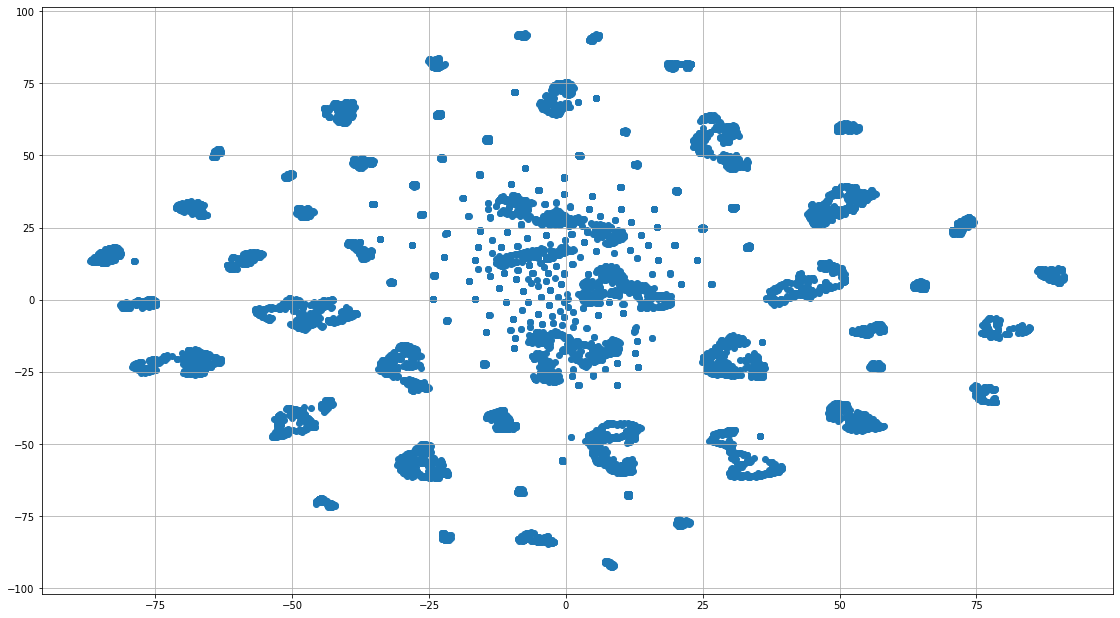

In [42]:
# plot the initial Kmeans cluster diagram
fig = plt.figure(figsize = (19.20,10.80))

plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.grid()
plt.show()

In [43]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_embedded)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,31843518.00
1,2,20589454.00
2,3,13379711.00
3,4,9427522.00
4,5,7558442.50
5,6,6279299.00
6,7,5239390.00
7,8,4615024.50
8,9,4011568.75
9,10,3536127.25


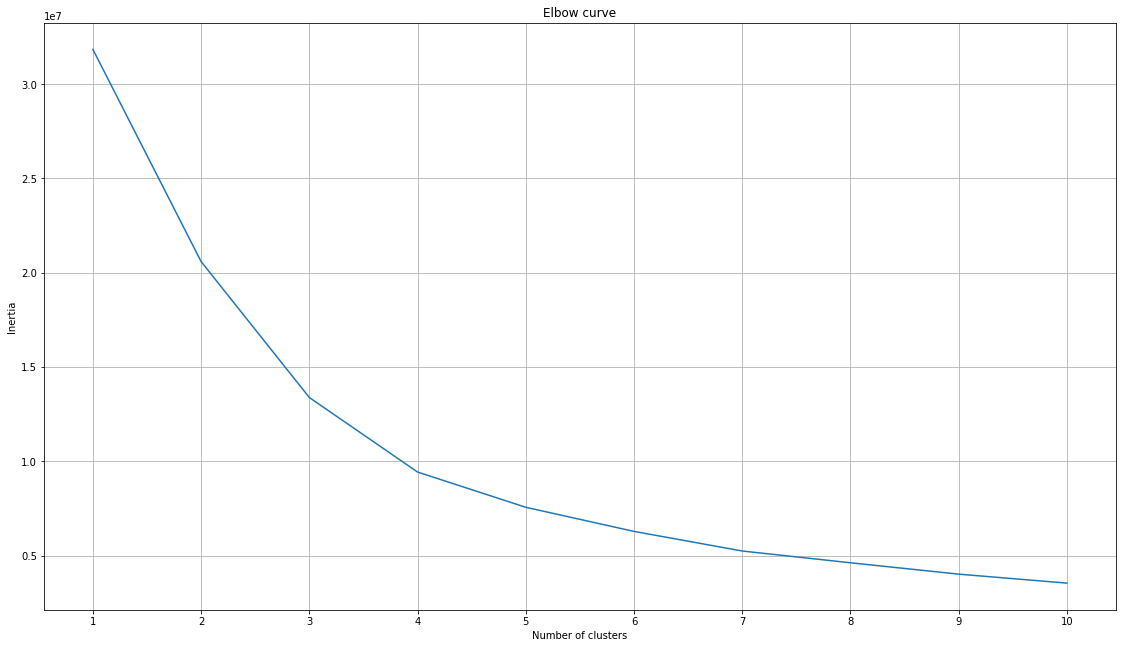

In [44]:
# Plot the elbow curve to find the best candidate(s) for k

fig = plt.figure(figsize = (19.20,10.80))

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.grid()
plt.show()

In [45]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [46]:
# transform embedded array into df for clustering purposes
cluster_df = pd.DataFrame(X_embedded, columns=['col_1','col_2'])

In [47]:
# display the cluster df
cluster_df

,col_1,col_2
0,51.192978,39.325325
1,28.796478,-15.500066
2,24.315052,57.776394
3,56.810825,-43.508915
4,42.859890,6.648370
...,...,...
9995,-76.844109,-1.175314
9996,-36.968464,14.304866
9997,19.427582,80.091972
9998,-42.946064,-34.765766


In [48]:
# after plotting the inertia of the K-means cluster data, 4 clusters was determined to be the best
clusters = get_clusters(4, cluster_df) 


In [49]:
def show_clusters(df):
    fig = plt.figure(figsize = (19.20,10.80))

    plt.scatter(df['col_1'], df['col_2'], c=df['class'])
    plt.xlabel('col_1')
    plt.ylabel('col_2')
    plt.grid()
    plt.show()

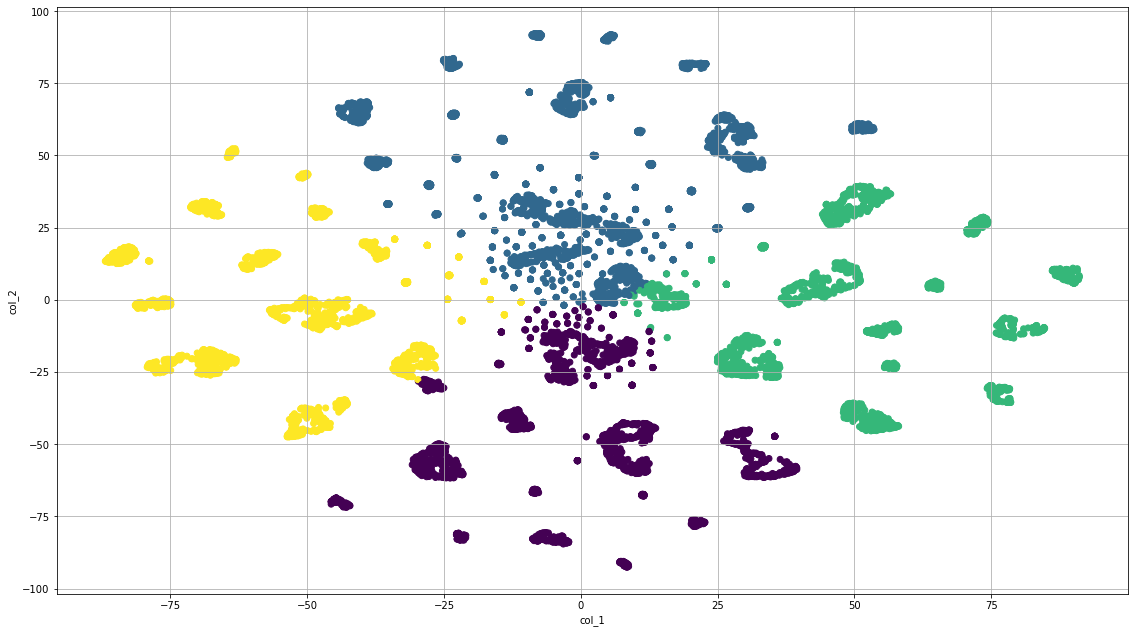

In [50]:
show_clusters(clusters)


In [51]:
model = KMeans(n_clusters=4, random_state=0)

# Train the model
model.fit(cluster_df)

# Predict clusters
predictions = model.predict(cluster_df)

# Create return DataFrame with predicted clusters
cluster_df["class"] = model.labels_

In [52]:
clusters

,col_1,col_2,class
0,51.192978,39.325325,2
1,28.796478,-15.500066,2
2,24.315052,57.776394,1
3,56.810825,-43.508915,2
4,42.859890,6.648370,2
...,...,...,...
9995,-76.844109,-1.175314,3
9996,-36.968464,14.304866,3
9997,19.427582,80.091972,1
9998,-42.946064,-34.765766,3


In [53]:
df_sample['class'] = clusters['class']

In [56]:
df_sample

,level_0,index,bodyclass,make,model,modelid,modelyear,mileage,askPrice,class
0,26955,26961,Sedan/Saloon,CHEVROLET,Cruze,1832.0,2013.0,99345,7611,2
1,88546,88562,Sedan/Saloon,HONDA,Accord,1861.0,2013.0,35291,15811,2
2,559609,559694,Sedan/Saloon,HONDA,Civic,1863.0,2009.0,58005,9000,1
3,522507,522584,Sedan/Saloon,FORD,Focus,1779.0,2015.0,35169,10000,2
4,282985,283034,Sedan/Saloon,VOLKSWAGEN,Jetta,3137.0,2012.0,119480,5895,2
...,...,...,...,...,...,...,...,...,...,...
9995,411532,411602,Sedan/Saloon,CHRYSLER,200,2053.0,2012.0,49619,8777,3
9996,98924,98943,Sedan/Saloon,LINCOLN,MKZ,1790.0,2018.0,25013,31550,3
9997,199645,199692,Sedan/Saloon,KIA,Forte,2462.0,2010.0,89643,5990,1
9998,47972,47979,Sedan/Saloon,NISSAN,Sentra,1907.0,2019.0,5157,15387,3
